In [2]:
# 1. Date-Related Features
# 2. Time-Based Features
# 3. Lag Features   t-1 is lag 1, t-2 is lag 2,
# 4. Rolling Window Feature  # calculating some statistical values based on past values , weighted average
# 5. Expanding Window Feature
# 6. Domain-Specific Features

In [3]:
import numpy as np

import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt

%matplotlib inline

#from pandas.core import datetools

df = pd.read_csv("C:\\Users\\radha\\Desktop\\dsp27 Class\\monthly_milk.csv")

df.head()

,month,milk_prod_per_cow_kg
0,1/1/1962,265.05
1,2/1/1962,252.45
2,3/1/1962,288.00
3,4/1/1962,295.20
4,5/1/1962,327.15


In [7]:

df['Datetime'] = pd.to_datetime(df['month'],format='%d/%m/%Y')
df.dtypes

month                           object
milk_prod_per_cow_kg           float64
Datetime                datetime64[ns]
dtype: object

In [12]:


df['year']=df['Datetime'].dt.year 
df['month']=df['Datetime'].dt.month 
df['day']=df['Datetime'].dt.day

df['dayofweek_num']=df['Datetime'].dt.dayofweek  
df['dayofweek_name']=df['Datetime'].dt.day_name()

df.head()



,month,milk_prod_per_cow_kg,Datetime,year,day,dayofweek_num,dayofweek_name
0,1,265.05,1962-01-01,1962,1,0,Monday
1,1,252.45,1962-01-02,1962,2,1,Tuesday
2,1,288.00,1962-01-03,1962,3,2,Wednesday
3,1,295.20,1962-01-04,1962,4,3,Thursday
4,1,327.15,1962-01-05,1962,5,4,Friday


In [13]:
df['Hour'] = df['Datetime'].dt.hour 
df['minute'] = df['Datetime'].dt.minute 

df.head()

,month,milk_prod_per_cow_kg,Datetime,year,day,dayofweek_num,dayofweek_name,Hour,minute
0,1,265.05,1962-01-01,1962,1,0,Monday,0,0
1,1,252.45,1962-01-02,1962,2,1,Tuesday,0,0
2,1,288.00,1962-01-03,1962,3,2,Wednesday,0,0
3,1,295.20,1962-01-04,1962,4,3,Thursday,0,0
4,1,327.15,1962-01-05,1962,5,4,Friday,0,0


In [15]:
# shift  1 to 12
df['lag_1'] = df['milk_prod_per_cow_kg'].shift(1)
df = df[['Datetime', 'lag_1', 'milk_prod_per_cow_kg']]
df.head()

,Datetime,lag_1,milk_prod_per_cow_kg
0,1962-01-01,NaN,265.05
1,1962-01-02,265.05,252.45
2,1962-01-03,252.45,288.00
3,1962-01-04,288.00,295.20
4,1962-01-05,295.20,327.15


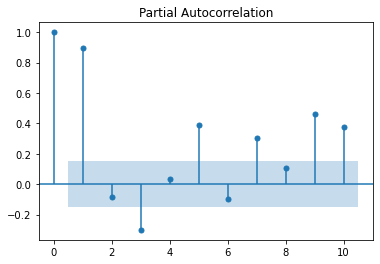

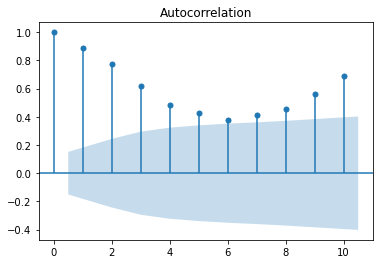

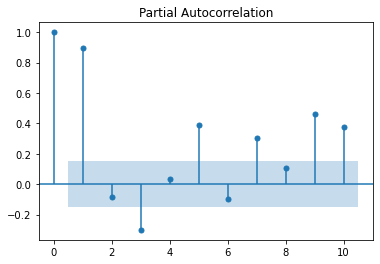

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(df['milk_prod_per_cow_kg'], lags=10)
plot_pacf(df['milk_prod_per_cow_kg'], lags=10)

In [19]:

df['rolling_mean'] = df['milk_prod_per_cow_kg'].rolling(window=7).mean()
df = df[['Datetime', 'rolling_mean', 'milk_prod_per_cow_kg']]
df.head(10)



,Datetime,rolling_mean,milk_prod_per_cow_kg
0,1962-01-01,NaN,265.05
1,1962-01-02,NaN,252.45
2,1962-01-03,NaN,288.00
3,1962-01-04,NaN,295.20
4,1962-01-05,NaN,327.15
5,1962-01-06,NaN,313.65
6,1962-01-07,289.928571,288.00
7,1962-01-08,290.571429,269.55
8,1962-01-09,291.021429,255.60
9,1962-01-10,286.971429,259.65


In [21]:

df['expanding_mean'] = df['milk_prod_per_cow_kg'].expanding(2).mean()
df = df[['Datetime','milk_prod_per_cow_kg', 'expanding_mean']]
df.head(10)

,Datetime,milk_prod_per_cow_kg,expanding_mean
0,1962-01-01,265.05,NaN
1,1962-01-02,252.45,258.750000
2,1962-01-03,288.00,268.500000
3,1962-01-04,295.20,275.175000
4,1962-01-05,327.15,285.570000
5,1962-01-06,313.65,290.250000
6,1962-01-07,288.00,289.928571
7,1962-01-08,269.55,287.381250
8,1962-01-09,255.60,283.850000
9,1962-01-10,259.65,281.430000


In [22]:

df['Datetime'].min(), df['Datetime'].max(), (df['Datetime'].max() -df['Datetime'].min())

(Timestamp('1962-01-01 00:00:00'),
 Timestamp('1975-01-12 00:00:00'),
 Timedelta('4759 days 00:00:00'))

In [23]:
# OTHERS

In [24]:
import datetime

x = datetime.datetime.now()
print(x)

2021-11-17 20:32:17.735982


In [25]:
print(x.year)
print(x.strftime("%A"))

2021
Wednesday


In [26]:
x = datetime.datetime(2021, 11, 17)
print(x)

2021-11-17 00:00:00


In [27]:
print(x.strftime("%B"))

November


In [28]:
# https://docs.python.org/3/library/datetime.html

In [31]:
from datetime import timedelta
year = timedelta(days=365)
ten_years = 10 * year
ten_years

datetime.timedelta(days=3650)

In [33]:
import time
from datetime import date
today = date.today()
today



datetime.date(2021, 11, 17)

In [34]:
from datetime import datetime, timedelta
# Using current time
ini_time_for_now = datetime.now()
# printing initial_date
print ("initial_date", str(ini_time_for_now))
  # Calculating future dates
# for two years
future_date_after_2yrs = ini_time_for_now + \
                        timedelta(days = 730)
  
future_date_after_2days = ini_time_for_now + \
                         timedelta(days = 2)
  
# printing calculated future_dates
print('future_date_after_2yrs:', str(future_date_after_2yrs))
print('future_date_after_2days:', str(future_date_after_2days))

initial_date 2021-11-17 20:40:30.922627
future_date_after_2yrs: 2023-11-17 20:40:30.922627
future_date_after_2days: 2021-11-19 20:40:30.922627


In [46]:
######  white noise



In [36]:
# If a time series is white noise, it is a sequence of random numbers and cannot be predicted.

#  time series is white noise if the variables are independent and identically distributed with a mean of zero.  : MEAN ZERO

In [37]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)

In [38]:
series

0      1.288185
1      1.449446
2      0.066336
3     -0.764544
4     -1.092173
         ...   
995    0.619316
996    0.395090
997   -0.602409
998   -0.240635
999    1.546682
Length: 1000, dtype: float64

In [39]:
# summary stats
print(series.describe())

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


In [40]:
# MEAN ZERO

<AxesSubplot:>

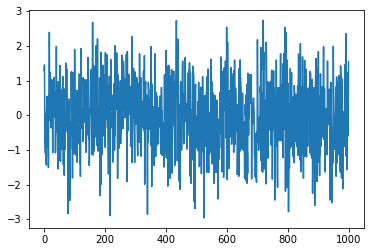

In [42]:
series.plot()


<AxesSubplot:>

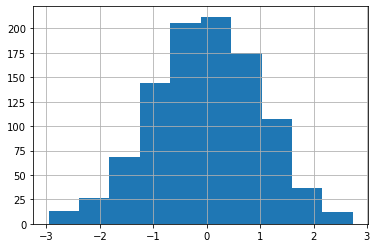

In [43]:
series.hist()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

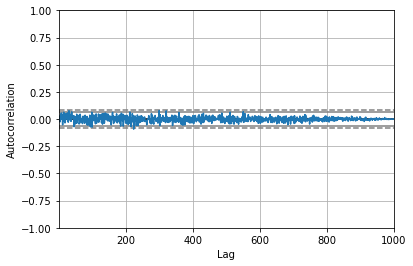

In [44]:
autocorrelation_plot(series)

In [45]:
# summary stats
print(df.describe())

       milk_prod_per_cow_kg  expanding_mean
count            168.000000      167.000000
mean             339.618750      307.408642
std               45.992036       19.665967
min              248.850000      258.750000
25%              304.987500      290.218500
50%              342.450000      306.799412
75%              371.025000      325.617379
max              436.050000      339.618750


In [47]:
# exponential smoothing

In [48]:
#Exponential smoothing is a time series forecasting method for univariate data that can be extended to support data 
#with a systematic trend or seasonal component. 

In [49]:
# exponential functions are used to assign exponentially decreasing weights over time.

In [50]:
# Basic (simple) exponential smoothing (Holt linear)

In [51]:
# The name 'exponential smoothing' is attributed to the use of the exponential window function during convolution. 

In [52]:
# Triple exponential smoothing (Holt Winters)

In [53]:
#Stationarity is the property of exhibiting constant statistical properties (mean, variance, autocorrelation, etc.). 
#If the mean of a time-series increases over time, then it’s not stationary.

In [54]:
# here are several spikes above the blue region, meaning there are correlations at lags 1, 2, 3 and 4. ACF/PACF